In [191]:
import pandas as pd
import numpy as np
import sqlite3
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
sql_query = """SELECT name FROM sqlite_master
    WHERE type='table';"""

conn = sqlite3.connect("/Users/99ksh/TDB/kocw.db")
cur = conn.cursor()
cur.execute(sql_query)
print(cur.fetchall())
conn.execute("PRAGMA foreign_keys = 1")

[('university',), ('professor',), ('course_classed',), ('norm_course',), ('charge',)]


### 1. 기본키 설정이 맞는지 확인 + 튜플의 수정 및 삭제

In [ ]:
## professor 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상

In [298]:
cur.execute("INSERT INTO professor VALUES(-1, '강신성', '자연계열', '전북대학교')")
cur.execute("SELECT * FROM professor LIMIT 5")
cur.fetchall()

[(-1, '강신성', '자연계열', '전북대학교'),
 (0, '안상욱', '자연계열', '한경대학교'),
 (1, '이중호', '자연계열', '가천대학교'),
 (2, '최수한', '자연계열', '단국대학교'),
 (3, '김문현', '자연계열', '성균관대학교')]

In [299]:
## 수정
cur.execute("UPDATE professor SET 제공대학명 = '조선대학교' WHERE 교수코드 = -1")
cur.execute("SELECT * FROM professor LIMIT 5")
cur.fetchall()

[(-1, '강신성', '자연계열', '조선대학교'),
 (0, '안상욱', '자연계열', '한경대학교'),
 (1, '이중호', '자연계열', '가천대학교'),
 (2, '최수한', '자연계열', '단국대학교'),
 (3, '김문현', '자연계열', '성균관대학교')]

In [300]:
## 삭제
cur.execute("DELETE FROM professor WHERE 교수코드 = -1")
cur.execute("SELECT * FROM professor LIMIT 5")
cur.fetchall()

[(0, '안상욱', '자연계열', '한경대학교'),
 (1, '이중호', '자연계열', '가천대학교'),
 (2, '최수한', '자연계열', '단국대학교'),
 (3, '김문현', '자연계열', '성균관대학교'),
 (4, '이상준', '자연계열', '덕성여자대학교')]

In [143]:
## university 중복되지 않은 기본키를 가지는 튜플 삽입 시 정상
cur.execute("INSERT INTO university VALUES('1조대학교', '뉴욕', '사립')")
cur.execute("SELECT * FROM university LIMIT 10 OFFSET 182")
cur.fetchall()

[('사이버한국외국어대학교', '서울특별시', '사립'),
 ('수원대학교', '경기도', '사립'),
 ('구미대학교', '경상북도', '사립'),
 ('가톨릭관동대학교', '강원특별자치도', '사립'),
 ('1조대학교', '뉴욕', '사립')]

In [144]:
## 수정
cur.execute("UPDATE university SET 대학소재지 = '도쿄' WHERE 제공대학명 = '1조대학교'")
cur.execute("SELECT * FROM university LIMIT 10 OFFSET 182")
cur.fetchall()

[('사이버한국외국어대학교', '서울특별시', '사립'),
 ('수원대학교', '경기도', '사립'),
 ('구미대학교', '경상북도', '사립'),
 ('가톨릭관동대학교', '강원특별자치도', '사립'),
 ('1조대학교', '도쿄', '사립')]

In [145]:
## 삭제
cur.execute("DELETE FROM university WHERE 제공대학명 = '1조대학교'")
cur.execute("SELECT * FROM university LIMIT 10 OFFSET 182")
cur.fetchall()

[('사이버한국외국어대학교', '서울특별시', '사립'),
 ('수원대학교', '경기도', '사립'),
 ('구미대학교', '경상북도', '사립'),
 ('가톨릭관동대학교', '강원특별자치도', '사립')]

In [146]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO professor VALUES(1, '강신성2', '자연계열', '전북대학교')")

IntegrityError: UNIQUE constraint failed: professor.교수코드

In [304]:
# 기존 university 테이블
cur.execute("SELECT * FROM university LIMIT 10")
cur.fetchall()

[('한경대학교', '경기도', '국립'),
 ('가천대학교', '경기도', '사립'),
 ('단국대학교', '경기도', '사립'),
 ('성균관대학교', '서울특별시', '사립'),
 ('덕성여자대학교', '서울특별시', '사립'),
 ('과학기술연합대학원대학교', '대전광역시', '국립'),
 ('국민대학교', '서울특별시', '사립'),
 ('금오공과대학교', '경상북도', '국립'),
 ('전북대학교', '전라북도', '국립'),
 ('건국대학교', '서울특별시', '사립')]

In [306]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO university VALUES('전북대학교', '뉴욕', '국립')")

IntegrityError: UNIQUE constraint failed: university.제공대학명

In [148]:
## norm_course 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상
cur.execute("INSERT INTO norm_course VALUES(-1, '윤리학개론', '2025', '3', '연세대학교', '2025-09-09')")
cur.execute("SELECT * FROM norm_course LIMIT 5")
cur.fetchall()

[(-1, '윤리학개론', 2025, 3, '연세대학교', '2025-09-09'),
 (127521, '윤리학 개론', 2009, 1, '연세대학교', '2009-03-12'),
 (127676, '발명과 특허', 2009, 1, '부경대학교', '2009-04-30'),
 (128045, '연구방법론', 2009, 1, '삼육대학교', '2015-08-30'),
 (128322, '사회복지 개론', 2009, 1, '을지대학교', '2009-06-30')]

In [149]:
## 수정
cur.execute("UPDATE norm_course SET 강의명 = '수학1' WHERE 강의코드 = -1")
cur.execute("SELECT * FROM norm_course LIMIT 5")
cur.fetchall()

[(-1, '수학1', 2025, 3, '연세대학교', '2025-09-09'),
 (127521, '윤리학 개론', 2009, 1, '연세대학교', '2009-03-12'),
 (127676, '발명과 특허', 2009, 1, '부경대학교', '2009-04-30'),
 (128045, '연구방법론', 2009, 1, '삼육대학교', '2015-08-30'),
 (128322, '사회복지 개론', 2009, 1, '을지대학교', '2009-06-30')]

In [150]:
## 삭제
cur.execute("DELETE FROM norm_course WHERE 강의코드 = -1")
cur.execute("SELECT * FROM norm_course LIMIT 5")
cur.fetchall()

[(127521, '윤리학 개론', 2009, 1, '연세대학교', '2009-03-12'),
 (127676, '발명과 특허', 2009, 1, '부경대학교', '2009-04-30'),
 (128045, '연구방법론', 2009, 1, '삼육대학교', '2015-08-30'),
 (128322, '사회복지 개론', 2009, 1, '을지대학교', '2009-06-30'),
 (128348, '부부 이마고 치료', 2009, 1, '수도국제대학원대학교', '2022-09-28')]

In [151]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO norm_course VALUES(127521, '수학1', '2025', '3', '연세대학교', '2025-09-09')")

IntegrityError: UNIQUE constraint failed: norm_course.강의코드

In [152]:
## course_classed 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상
cur.execute("INSERT INTO course_classed VALUES('가수업', '가분류')")
cur.execute("SELECT * FROM course_classed ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[('가수업', '가분류'),
 ('예방치과학의 이해', '자연과학기타'),
 ('과학사 이해', '자연과학기타'),
 ('회귀분석(II)', '수학ㆍ물리ㆍ천문ㆍ지리'),
 ('AI를 위한 딥러닝', '수학ㆍ물리ㆍ천문ㆍ지리')]

In [153]:
## 수정
cur.execute("UPDATE course_classed SET 교육분류 = '나분류' WHERE 강의명 = '가수업'")
cur.execute("SELECT * FROM course_classed ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[('가수업', '나분류'),
 ('예방치과학의 이해', '자연과학기타'),
 ('과학사 이해', '자연과학기타'),
 ('회귀분석(II)', '수학ㆍ물리ㆍ천문ㆍ지리'),
 ('AI를 위한 딥러닝', '수학ㆍ물리ㆍ천문ㆍ지리')]

In [154]:
## 삭제
cur.execute("DELETE FROM course_classed WHERE 강의명 = '가수업'")
cur.execute("SELECT * FROM course_classed ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[('예방치과학의 이해', '자연과학기타'),
 ('과학사 이해', '자연과학기타'),
 ('회귀분석(II)', '수학ㆍ물리ㆍ천문ㆍ지리'),
 ('AI를 위한 딥러닝', '수학ㆍ물리ㆍ천문ㆍ지리'),
 ('다변량통계학(II)', '수학ㆍ물리ㆍ천문ㆍ지리')]

In [155]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO course_classed VALUES('과학사 이해', '다분류')")
cur.fetchall()

IntegrityError: UNIQUE constraint failed: course_classed.강의명

In [156]:
## charge 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상
cur.execute("INSERT INTO charge VALUES(1, 1112400)")
cur.execute("SELECT * FROM charge ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[(1, 1112400), (8913, 1398367), (852, 820840), (60, 1445911), (7838, 1443736)]

In [157]:
## 삭제
cur.execute("DELETE FROM charge WHERE 교수코드= 1 AND 강의코드= 111240")
cur.execute("SELECT * FROM charge ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[(1, 1112400), (8913, 1398367), (852, 820840), (60, 1445911), (7838, 1443736)]

In [158]:
## charge 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO charge VALUES(1, 1104074)")

IntegrityError: UNIQUE constraint failed: charge.교수코드, charge.강의코드

### 2.기본키 삭제에 따른 외래키 변화 확인

In [309]:
# 원래 professor 테이블
cur.execute("SELECT * FROM professor WHERE 제공대학명 = '전북대학교' LIMIT 5")
cur.fetchall()

[(9, '마인숙', '자연계열', '전북대학교'),
 (103, '곽지이', '자연계열', '전북대학교'),
 (104, '이선영', '자연계열', '전북대학교'),
 (105, '정수미', '자연계열', '전북대학교'),
 (106, '최일선', '자연계열', '전북대학교')]

In [170]:
# norm_course 원래 테이블
cur.execute("SELECT * FROM norm_course WHERE 제공대학명 = '전북대학교' LIMIT 5")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

강의코드            강의명  강의년도  강의학기  제공대학명        제공일자
0  133761       자바 프로그래밍  2009     1  전북대학교  2008-12-11
1  145685         조경수 관리  2009     1  전북대학교  2009-11-05
2  153670      전력전자 및 실험  2009     2  전북대학교  2010-04-28
3  156266        기능생리학 1  2009     1  전북대학교  2010-06-10
4  156446  BIN융합개론및세미나 1  2009     1  전북대학교  2010-06-11

In [172]:
cur.execute("SELECT * FROM university WHERE 제공대학명 = '전북대학교'")
cur.fetchall()

[('전북대학교', '전라북도', '국립')]

In [173]:
#기본키 수정
cur.execute("UPDATE university SET 제공대학명 = '전북특별자치대학교' WHERE 제공대학명 = '전북대학교'")
cur.execute("SELECT * FROM university WHERE 제공대학명 = '전북특별자치대학교'")
cur.execute("SELECT * FROM norm_course WHERE 제공대학명 = '전북특별자치대학교' LIMIT 5")
cur.execute("SELECT * FROM professor WHERE 제공대학명 = '전북대학교' LIMIT 5") # 바뀐 내용 보여주기
cur.fetchall()

[]

In [174]:
#원래대로 복구
cur.execute("UPDATE university SET 제공대학명 = '전북대학교' WHERE 제공대학명 = '전북특별자치대학교'")
cur.execute("SELECT * FROM professor WHERE 제공대학명 = '전북대학교' LIMIT 5")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

교수코드 담당교수명  담당분야  제공대학명
0     9   마인숙  자연계열  전북대학교
1   103   곽지이  자연계열  전북대학교
2   104   이선영  자연계열  전북대학교
3   105   정수미  자연계열  전북대학교
4   106   최일선  자연계열  전북대학교

In [176]:
#기본키 삭제(ON DELETE SET NULL) 전북대학교 삭제
cur.execute("DELETE FROM university WHERE 제공대학명 = '전북대학교'")
cur.execute("SELECT * FROM norm_course WHERE 제공대학명 IS NULL LIMIT 5")
cur.execute("SELECT * FROM professor WHERE 제공대학명 IS NULL LIMIT 5")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

교수코드 담당교수명  담당분야 제공대학명
0     9   마인숙  자연계열  None
1   103   곽지이  자연계열  None
2   104   이선영  자연계열  None
3   105   정수미  자연계열  None
4   106   최일선  자연계열  None

In [177]:
cur.execute("SELECT * FROM norm_course WHERE 제공대학명 IS NULL LIMIT 5")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

강의코드            강의명  강의년도  강의학기 제공대학명        제공일자
0  133761       자바 프로그래밍  2009     1  None  2008-12-11
1  145685         조경수 관리  2009     1  None  2009-11-05
2  153670      전력전자 및 실험  2009     2  None  2010-04-28
3  156266        기능생리학 1  2009     1  None  2010-06-10
4  156446  BIN융합개론및세미나 1  2009     1  None  2010-06-11

In [182]:
#기본키 삭제(ON DELETE CASCADE)
cur.execute("SELECT * FROM norm_course WHERE 강의명 = '수학1'")
cur.execute("DELETE FROM course_classed WHERE 강의명 = '수학1'")
cur.execute("SELECT * FROM norm_course WHERE 강의명 = '수학1'")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

Empty DataFrame
Columns: [강의코드, 강의명, 강의년도, 강의학기, 제공대학명, 제공일자]
Index: []

## 3. 조인 조작의 정상성 여부 확인

#### 조인을 이용해 쪼개기 전 테이블 만들기

In [192]:
conn = sqlite3.connect("/Users/99ksh/TDB/kocw.db")
cur = conn.cursor()

In [186]:
#제공대학명을 기준으로 교수와 제공대학을 내부 조인
cur.execute("SELECT * FROM professor LIMIT 6")
cur.execute("SELECT * FROM university LIMIT 6")
cur.execute("""
    SELECT 교수코드, 담당교수명, 담당분야, university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명 
    LIMIT 6
""")
cur.fetchall()

[(0, '안상욱', '자연계열', '한경대학교', '경기도', '국립'),
 (1, '이중호', '자연계열', '가천대학교', '경기도', '사립'),
 (2, '최수한', '자연계열', '단국대학교', '경기도', '사립'),
 (3, '김문현', '자연계열', '성균관대학교', '서울특별시', '사립'),
 (4, '이상준', '자연계열', '덕성여자대학교', '서울특별시', '사립'),
 (5, '나성호', '자연계열', '과학기술연합대학원대학교', '대전광역시', '국립')]

In [187]:
#위 테이블과 담당을 조인
cur.execute("SELECT * FROM charge LIMIT 6")
cur.execute("""
    SELECT 강의코드, professor.교수코드 AS 교수코드, 담당교수명, 담당분야, university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명
    INNER JOIN charge ON professor.교수코드 = charge.교수코드 
    LIMIT 6
""")
cur.fetchall()

[(1095582, 0, '안상욱', '자연계열', '한경대학교', '경기도', '국립'),
 (1104074, 1, '이중호', '자연계열', '가천대학교', '경기도', '사립'),
 (1110603, 2, '최수한', '자연계열', '단국대학교', '경기도', '사립'),
 (1112400, 3, '김문현', '자연계열', '성균관대학교', '서울특별시', '사립'),
 (1118072, 4, '이상준', '자연계열', '덕성여자대학교', '서울특별시', '사립'),
 (1118158, 4, '이상준', '자연계열', '덕성여자대학교', '서울특별시', '사립')]

In [188]:
#위 테이블과 강의를 조인
cur.execute("SELECT * FROM norm_course LIMIT 6")
cur.execute("""
    SELECT norm_course.강의코드 AS 강의코드, 강의명, 강의년도, 강의학기, 제공일자,
           professor.교수코드 AS 교수코드, 담당교수명, 담당분야,
           university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명
    INNER JOIN charge ON professor.교수코드 = charge.교수코드
    INNER JOIN norm_course ON charge.강의코드 = norm_course.강의코드 
    LIMIT 6
""")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

강의코드    강의명  강의년도  강의학기        제공일자  교수코드 담당교수명  담당분야    제공대학명  대학소재지  \
0  1095582  대학수학1  2015     1  2015-08-30     0   안상욱  자연계열    한경대학교    경기도   
1  1104074    수학1  2015     1  2015-09-14     1   이중호  자연계열    가천대학교    경기도   
2  1110603   미적분학  2015     1  2015-10-08     2   최수한  자연계열    단국대학교    경기도   
3  1112400  공학수학1  2015     1  2015-11-02     3   김문현  자연계열   성균관대학교  서울특별시   
4  1118072    정수론  2015     2  2015-12-16     4   이상준  자연계열  덕성여자대학교  서울특별시   
5  1118158    확률론  2015     2  2015-12-16     4   이상준  자연계열  덕성여자대학교  서울특별시   

   구분  
0  국립  
1  사립  
2  사립  
3  사립  
4  사립  
5  사립

In [189]:
#위 테이블과 강의교육분류를 내부 조인
cur.execute("SELECT * FROM course_classed LIMIT 6")
cur.execute("""
    SELECT norm_course.강의코드 AS 강의코드, 강의년도, 강의학기, 제공일자,
           course_classed.강의명 AS 강의명, 교육분류,
           professor.교수코드 AS 교수코드, 담당교수명, 담당분야,
           university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명
    INNER JOIN charge ON professor.교수코드 = charge.교수코드
    INNER JOIN norm_course ON charge.강의코드 = norm_course.강의코드
    INNER JOIN course_classed ON norm_course.강의명 = course_classed.강의명 
    LIMIT 6
""")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
data_df = pd.DataFrame.from_records(data=rows, columns=cols)
data_df

강의코드  강의년도  강의학기        제공일자    강의명         교육분류  교수코드 담당교수명  담당분야  \
0  1095582  2015     1  2015-08-30  대학수학1  수학ㆍ물리ㆍ천문ㆍ지리     0   안상욱  자연계열   
1  1104074  2015     1  2015-09-14    수학1  수학ㆍ물리ㆍ천문ㆍ지리     1   이중호  자연계열   
2  1110603  2015     1  2015-10-08   미적분학  수학ㆍ물리ㆍ천문ㆍ지리     2   최수한  자연계열   
3  1112400  2015     1  2015-11-02  공학수학1  수학ㆍ물리ㆍ천문ㆍ지리     3   김문현  자연계열   
4  1118072  2015     2  2015-12-16    정수론  수학ㆍ물리ㆍ천문ㆍ지리     4   이상준  자연계열   
5  1118158  2015     2  2015-12-16    확률론  수학ㆍ물리ㆍ천문ㆍ지리     4   이상준  자연계열   

     제공대학명  대학소재지  구분  
0    한경대학교    경기도  국립  
1    가천대학교    경기도  사립  
2    단국대학교    경기도  사립  
3   성균관대학교  서울특별시  사립  
4  덕성여자대학교  서울특별시  사립  
5  덕성여자대학교  서울특별시  사립

## 4. 정보 추출을 위한 주요 변수 및 목표 서술

In [ ]:
> 대학소재지, 대학명, 대학구분, 강의년도, 강의학기
-> 시간의 흐름에 따라 제공되는 강의 수가 어떻게 바뀌는지 python

In [268]:
conn = sqlite3.connect("/Users/99ksh/TDB/kocw.db")
cur = conn.cursor()

In [215]:
cur.execute("SELECT 강의년도, 강의학기, 강의코드 FROM norm_course")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

강의년도  강의학기     강의코드
0      2009     1   127521
1      2009     1   127676
2      2009     1   128045
3      2009     1   128322
4      2009     1   128348
...     ...   ...      ...
16809  2022     1  1448791
16810  2022     1  1448831
16811  2022     2  1448861
16812  2022     2  1448911
16813  2022     2  1448951

[16814 rows x 3 columns]

In [221]:
cur.execute("""
    SELECT 강의년도, 강의학기,
    COUNT(*) as '제공강의 수'
    FROM norm_course 
    GROUP BY 강의년도, 강의학기
    ORDER BY 강의년도, 강의학기
""")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

강의년도  강의학기  제공강의 수
0   2007     1       1
1   2009     1    1414
2   2009     2      85
3   2010     1     179
4   2010     2     205
5   2011     1     431
6   2011     2     466
7   2012     1     714
8   2012     2     724
9   2013     1     771
10  2013     2     769
11  2014     1     777
12  2014     2     951
13  2015     1     799
14  2015     2     975
15  2016     1     718
16  2016     2     801
17  2017     1     621
18  2017     2     861
19  2018     1     469
20  2018     2     576
21  2019     1     466
22  2019     2     641
23  2020     1     378
24  2020     2     635
25  2021     1     666
26  2021     2     480
27  2022     1     213
28  2022     2      28

<Axes: >

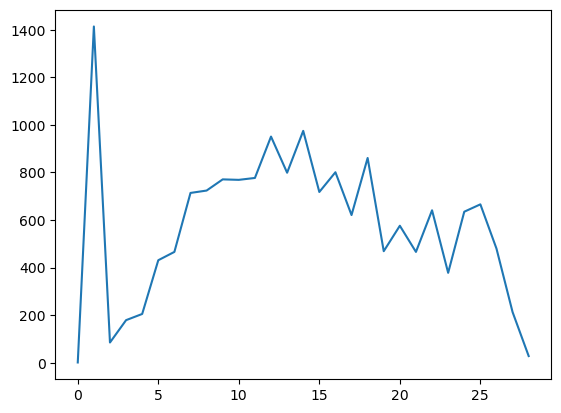

In [222]:
fetchall["제공강의 수"].plot()

- 강의 수가 증가하질 않는다. 왜그럴까?

- K-MOOC 운영 개시일 : 2015년 10월.
- 실제로 2015년 2학기를 기점으로 강의 수가 내려가는 추세인 것을 확인할 수 있음. 기존에 KOCW에서만 강의가 제공되었지만 K-MOOC이 새로 서비스를 시작하면서 제공되는 강의들이 KOCW와 K-MOOC으로 나뉘어져서 KOCW에 대한 의존도가 줄어들었기 떄문에 나타나는 현상이라고 생각된다.

In [ ]:
Python - 추출하고자하는 정보를 위해서 조인 및 추출 조작을 통해서 (외부) 데이터 프레임 구성

## 1. 로지스틱 회귀분석(국립/사립 분류)이 의미가 있을까?

In [272]:
cur.execute("""
    SELECT norm_course.강의코드 AS 강의코드, 강의명, 강의년도, 강의학기, 제공일자,
           professor.교수코드 AS 교수코드, 담당교수명, 담당분야,
           university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명
    INNER JOIN charge ON professor.교수코드 = charge.교수코드
    INNER JOIN norm_course ON charge.강의코드 = norm_course.강의코드 
""")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

강의코드         강의명  강의년도  강의학기        제공일자  교수코드 담당교수명  담당분야    제공대학명  \
0      1095582       대학수학1  2015     1  2015-08-30     0   안상욱  자연계열    한경대학교   
1      1104074         수학1  2015     1  2015-09-14     1   이중호  자연계열    가천대학교   
2      1110603        미적분학  2015     1  2015-10-08     2   최수한  자연계열    단국대학교   
3      1112400       공학수학1  2015     1  2015-11-02     3   김문현  자연계열   성균관대학교   
4      1118072         정수론  2015     2  2015-12-16     4   이상준  자연계열  덕성여자대학교   
...        ...         ...   ...   ...         ...   ...   ...   ...      ...   
17286  1430653  다변량통계학(II)  2021     2  2015-01-08  8638   최용석  자연계열    부산대학교   
17287  1443736  AI를 위한 딥러닝  2022     1  2016-04-07  7838   곽일엽  자연계열    중앙대학교   
17288  1445911    회귀분석(II)  2021     2  2017-10-17    60   김충락  자연계열    부산대학교   
17289   820840      과학사 이해  2013     2  2012-02-29   852   박종범  자연계열    신라대학교   
17290  1398367   예방치과학의 이해  2020     2  2013-01-31  8913   좌수경  자연계열  울산과학대학교   

       대학소재지  구분  
0        경기도  국립  
1        경기도  사립  
2        경기도  사립  
3      서울특별시  사립  
4      서울특별시  사립  
...      ...  ..  
17286  부산광역시  국립  
17287  서울특별시  사립  
17288  부산광역시  국립  
17289  부산광역시  사립  
17290  울산광역시  사립  

[17291 rows x 11 columns]

In [277]:
course_count = fetchall.pivot_table(index = "제공대학명", values = "강의명", aggfunc = "count")\
.reset_index()\
.rename({"강의명" : "제공강의 수"}, axis = 1)
course_count

제공대학명  제공강의 수
0        가천대학교     354
1     가톨릭관동대학교       1
2    가톨릭꽃동네대학교      14
3       가톨릭대학교      91
4        강남대학교     102
..         ...     ...
181    한양여자대학교       3
182      협성대학교       1
183      호남대학교     120
184      호서대학교      61
185      홍익대학교      34

[186 rows x 2 columns]

In [278]:
professor_count = fetchall.pivot_table(index = "제공대학명", values = "교수코드", aggfunc = "count")\
.reset_index()\
.rename({"교수코드" : "참여교수 수"}, axis = 1)
professor_count

제공대학명  참여교수 수
0        가천대학교     354
1     가톨릭관동대학교       1
2    가톨릭꽃동네대학교      14
3       가톨릭대학교      91
4        강남대학교     102
..         ...     ...
181    한양여자대학교       3
182      협성대학교       1
183      호남대학교     120
184      호서대학교      61
185      홍익대학교      34

[186 rows x 2 columns]

In [281]:
cur.execute("SELECT * FROM university")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
university = pd.DataFrame.from_records(data=rows, columns=cols) # university 테이블을 data.frame으로저장
university

제공대학명    대학소재지  구분
0          한경대학교      경기도  국립
1          가천대학교      경기도  사립
2          단국대학교      경기도  사립
3         성균관대학교    서울특별시  사립
4        덕성여자대학교    서울특별시  사립
..           ...      ...  ..
181   수도국제대학원대학교    서울특별시  국립
182  사이버한국외국어대학교    서울특별시  사립
183        수원대학교      경기도  사립
184        구미대학교     경상북도  사립
185     가톨릭관동대학교  강원특별자치도  사립

[186 rows x 3 columns]

In [283]:
df = university.merge(course_count).merge(professor_count)
df

제공대학명    대학소재지  구분  제공강의 수  참여교수 수
0          한경대학교      경기도  국립     236     236
1          가천대학교      경기도  사립     354     354
2          단국대학교      경기도  사립     187     187
3         성균관대학교    서울특별시  사립     437     437
4        덕성여자대학교    서울특별시  사립      75      75
..           ...      ...  ..     ...     ...
181   수도국제대학원대학교    서울특별시  국립       1       1
182  사이버한국외국어대학교    서울특별시  사립      13      13
183        수원대학교      경기도  사립       1       1
184        구미대학교     경상북도  사립       1       1
185     가톨릭관동대학교  강원특별자치도  사립       1       1

[186 rows x 5 columns]

In [285]:
## features and target
X = df[["제공강의 수", "참여교수 수"]]
y = df["구분"]

## predictor
predictr = sklearn.linear_model.LogisticRegression()

## fitting
predictr.fit(X, y)

## predict
predictr.predict(X)

array(['사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사

In [286]:
predictr.coef_

array([[0.00024363, 0.00024363]])

In [287]:
predictr.score(X, y)  ## 전부 사립으로 예측했음. 사립이 애초에 더 많음

0.8279569892473119